# **AI-Generated vs Real Images Classifier**
> Marlon Barajas Acelas - 2202042

# **Contexto y Justificación**
> Se pretende plantear un modelo que determine la procedencia de determinadas imágenes, para clasificarlas según sean imágenes reales o generadas por inteligencia artificial, una tarea importante ahora que es altamente difícil diferenciarlas a simple vista. En un primer momento se procesarán las imágenes para conocer y clasificar sus formatos y características, y consecuentemente modificarlos o agregar atributos necesarios.

# **Dataset**
>[AI Generated Images vs Real Images](https://www.kaggle.com/datasets/cashbowman/ai-generated-images-vs-real-images/data):
El dataset se divide en dos únicas carpetas que contienen imágenes tomadas de internet o generadas por AI. Los temas principales de estas son paisajes, pinturas, retratos, fotos y viajes psicodélicos.
- ai: Contiene las imágenes generadas por AI para el estudio.
- real: Contiene imágenes reales de las temáticas mencionadas.

In [ ]:
#@title **Drive mounting**
import os

from google.colab import drive
drive.mount('/content/drive', force_remount=True)
os.chdir('/content/drive/My Drive/AI_E1/project')
print(os.getcwd())

Mounted at /content/drive
/content/drive/.shortcut-targets-by-id/13Atq1cnFEbxtFI2zny9KtEmx9o1KU4oJ/AI_E1/project


In [49]:
#@title **Libraries**
import pandas as pd
import numpy as np
import cv2
import matplotlib.pylab as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

from glob import glob

import seaborn as sns
sns.set_theme()

# **Data processing**

## Real imgs

In [ ]:
real_files = glob('imgs/real/*')
real_files_jpg = glob('imgs/real/*.jpg')
real_files_jpeg = glob('imgs/real/*.jpeg')
real_files_png = glob('imgs/real/*.png')

print('complete folder:', len(real_files), '\n.jpg:', len(real_files_jpg), '\n.jpeg:', len(real_files_jpeg), '\n.png:', len(real_files_png))
print('total:', len(real_files_jpg) + len(real_files_jpeg) + len(real_files_png))

complete folder: 431 
.jpg: 376 
.jpeg: 21 
.png: 34
total: 431


## AI imgs

In [ ]:
ai_files = glob('imgs/ai/*')
ai_files_jpg = glob('imgs/ai/*.jpg')
ai_files_jpeg = glob('imgs/ai/*.jpeg')
ai_files_png = glob('imgs/ai/*.png')

print('complete folder:', len(ai_files), '\n.jpg:', len(ai_files_jpg), '\n.jpeg:', len(ai_files_jpeg), '\n.png:', len(ai_files_png))
print('total:', len(ai_files_jpg) + len(ai_files_jpeg) + len(ai_files_png))

complete folder: 492 
.jpg: 353 
.jpeg: 36 
.png: 103
total: 492


## Showing data

In [ ]:
real_img_mpl = plt.imread(real_files[218])
real_img_cv2 = cv2.imread(real_files[218])

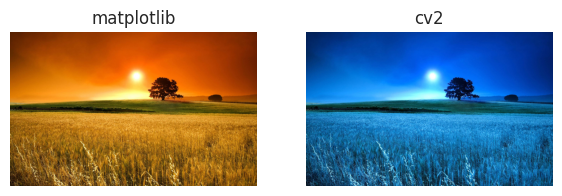

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(7, 4))
axs[0].imshow(real_img_mpl)
axs[1].imshow(real_img_cv2)
axs[0].axis('off')
axs[1].axis('off')
axs[0].set_title('matplotlib')
axs[1].set_title('cv2')
plt.show()

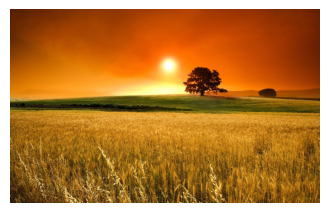

In [ ]:
# converting cv2 BGR to RGB
real_img_cv2_rgb = cv2.cvtColor(real_img_cv2, cv2.COLOR_BGR2RGB)
fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(real_img_cv2_rgb)
ax.axis('off')
plt.show()

<Axes: ylabel='Frequency'>

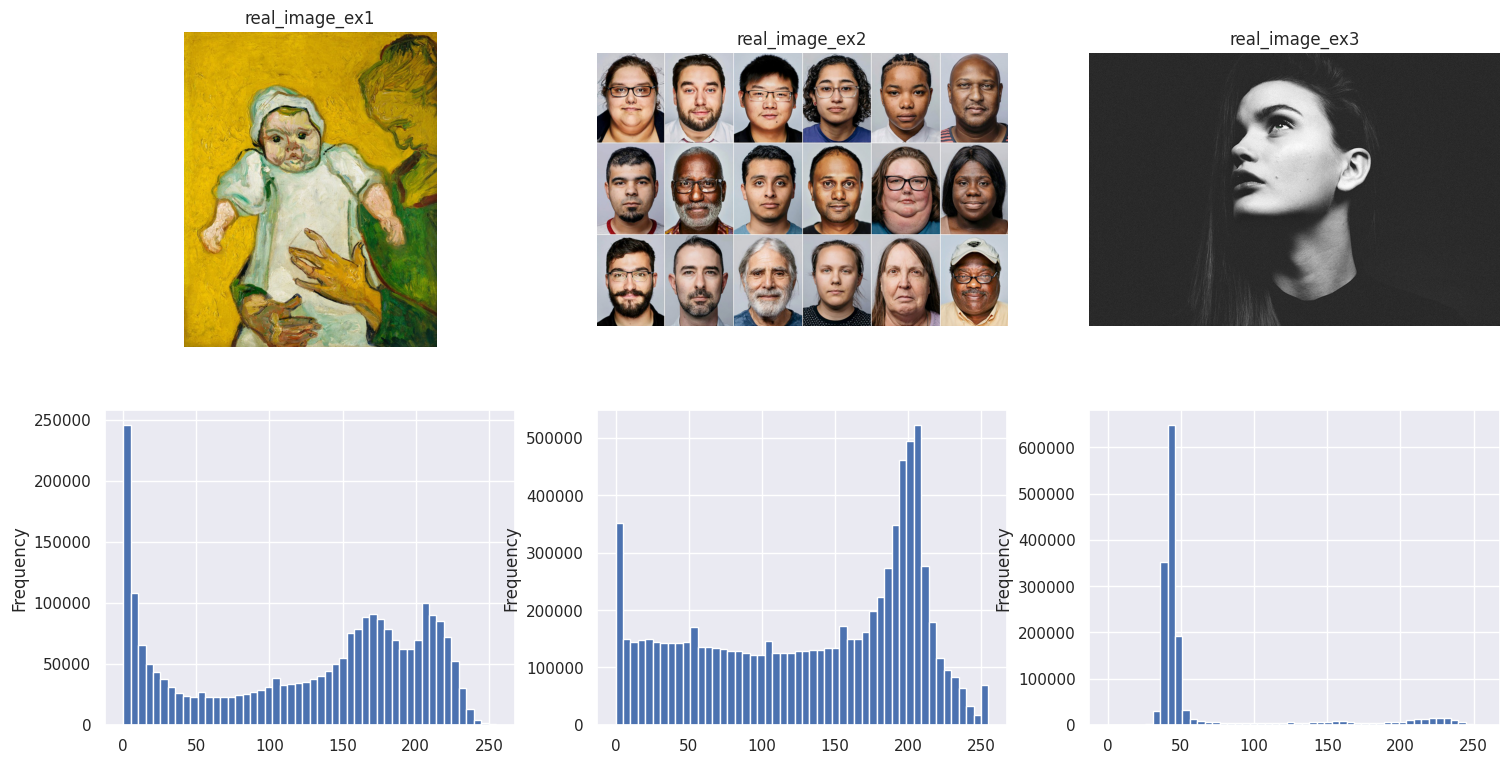

In [ ]:
real_ex_1 = plt.imread(real_files[70])
real_ex_2 = plt.imread(real_files[180])
real_ex_3 = plt.imread(real_files[390])

plt.figure(figsize=(18,9))

plt.subplot(2, 3, 1)
plt.title('real_image_ex1')
plt.imshow(real_ex_1)
plt.axis('off')

plt.subplot(2, 3, 2)
plt.title('real_image_ex2')
plt.imshow(real_ex_2)
plt.axis('off')

plt.subplot(2, 3, 3)
plt.title('real_image_ex3')
plt.imshow(real_ex_3)
plt.axis('off')

plt.subplot(2, 3, 4)
pd.Series(real_ex_1.flatten()).plot(kind='hist', bins=50)

plt.subplot(2, 3, 5)
pd.Series(real_ex_2.flatten()).plot(kind='hist', bins=50)

plt.subplot(2, 3, 6)
pd.Series(real_ex_3.flatten()).plot(kind='hist', bins=50)

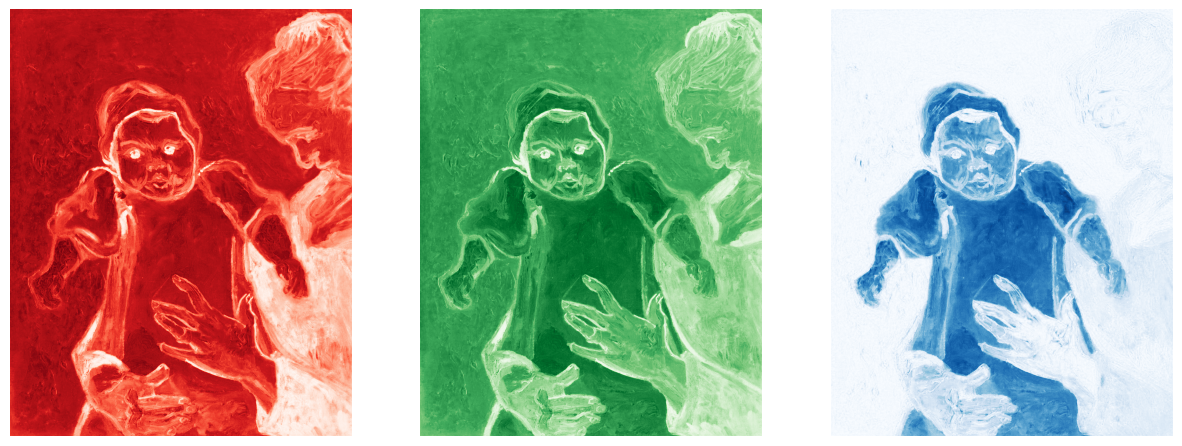

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15, 7))
axs[0].imshow(real_ex_1[:, :, 0], cmap='Reds')
axs[1].imshow(real_ex_1[:, :, 1], cmap='Greens')
axs[2].imshow(real_ex_1[:, :, 2], cmap='Blues')
axs[0].axis('off')
axs[1].axis('off')
axs[2].axis('off')
plt.show()

<Axes: ylabel='Frequency'>

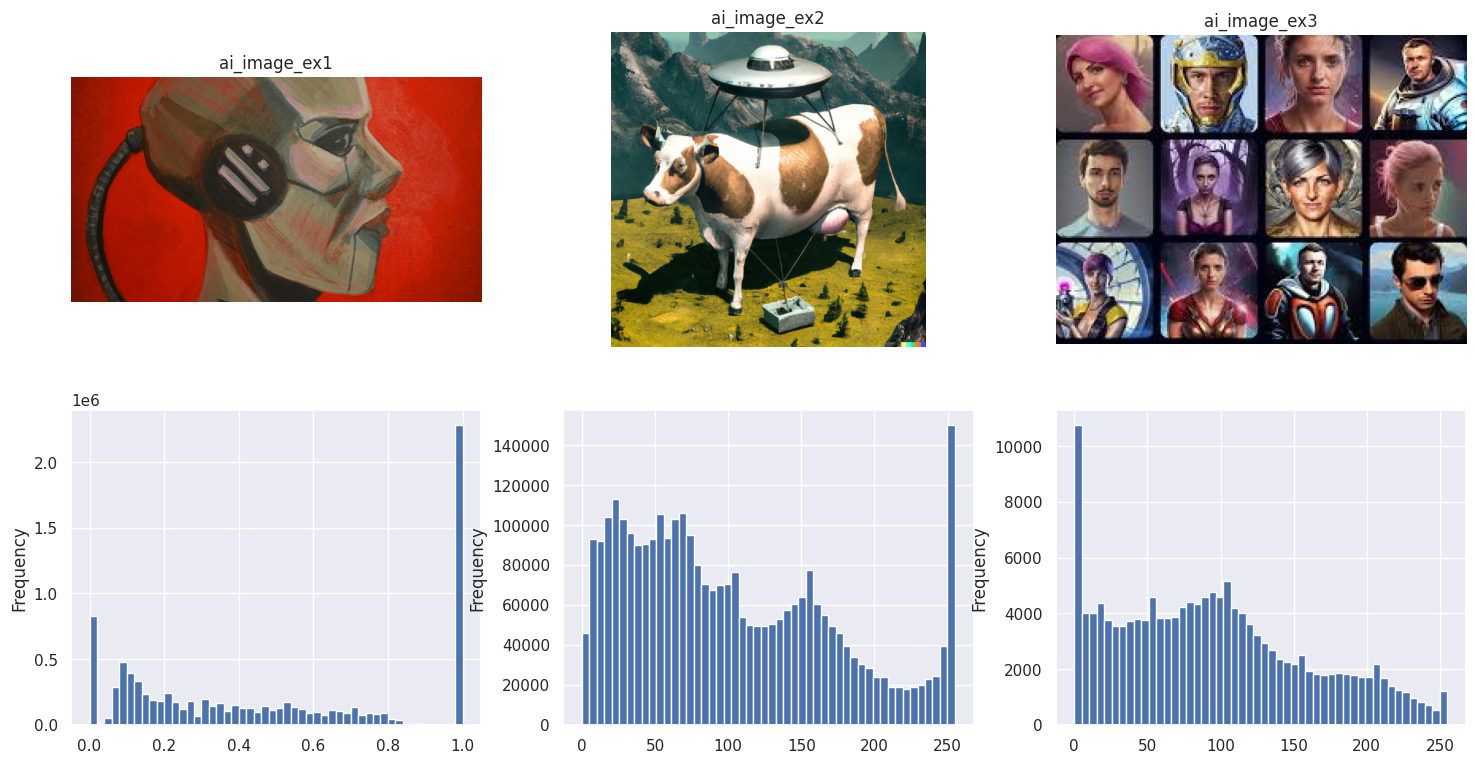

In [ ]:
ai_ex_1 = plt.imread(ai_files[70])
ai_ex_2 = plt.imread(ai_files[209])
ai_ex_3 = plt.imread(ai_files[390])

plt.figure(figsize=(18,9))

plt.subplot(2, 3, 1)
plt.title('ai_image_ex1')
plt.imshow(ai_ex_1)
plt.axis('off')

plt.subplot(2, 3, 2)
plt.title('ai_image_ex2')
plt.imshow(ai_ex_2)
plt.axis('off')

plt.subplot(2, 3, 3)
plt.title('ai_image_ex3')
plt.imshow(ai_ex_3)
plt.axis('off')

plt.subplot(2, 3, 4)
pd.Series(ai_ex_1.flatten()).plot(kind='hist', bins=50)

plt.subplot(2, 3, 5)
pd.Series(ai_ex_2.flatten()).plot(kind='hist', bins=50)

plt.subplot(2, 3, 6)
pd.Series(ai_ex_3.flatten()).plot(kind='hist', bins=50)

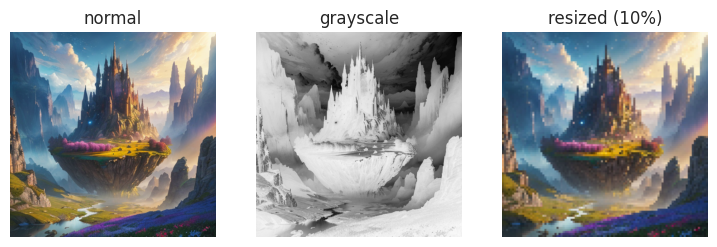

In [ ]:
ai_img_mpl_485 = plt.imread(ai_files[485])
ai_img_mpl_485_grey = cv2.cvtColor(ai_img_mpl_485, cv2.COLOR_RGB2GRAY)

width = int(ai_img_mpl_485.shape[1]*0.1)
height = int(ai_img_mpl_485.shape[0]*0.1)
dSize = (width, height)
ai_img_mpl_485_resized = cv2.resize(ai_img_mpl_485, dSize)

fig, axs = plt.subplots(1, 3, figsize=(9, 4))
axs[0].imshow(ai_img_mpl_485)
axs[1].imshow(ai_img_mpl_485_grey, cmap='Greys')
axs[2].imshow(ai_img_mpl_485_resized)
axs[0].axis('off')
axs[1].axis('off')
axs[2].axis('off')
axs[0].set_title('normal')
axs[1].set_title('grayscale')
axs[2].set_title('resized (10%)')
plt.show()

# Image dataset from directory (keras)

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('imgs')
data_iterator = data.as_numpy_iterator()

Found 925 files belonging to 2 classes.


In [ ]:
#@title Scale data
data = data.map(lambda x, y: (x/255, y))
scaled_iterator = data.as_numpy_iterator()
batch = scaled_iterator.next()

In [ ]:
batch[0].min(), batch[0].max()

(0.0, 1.0)

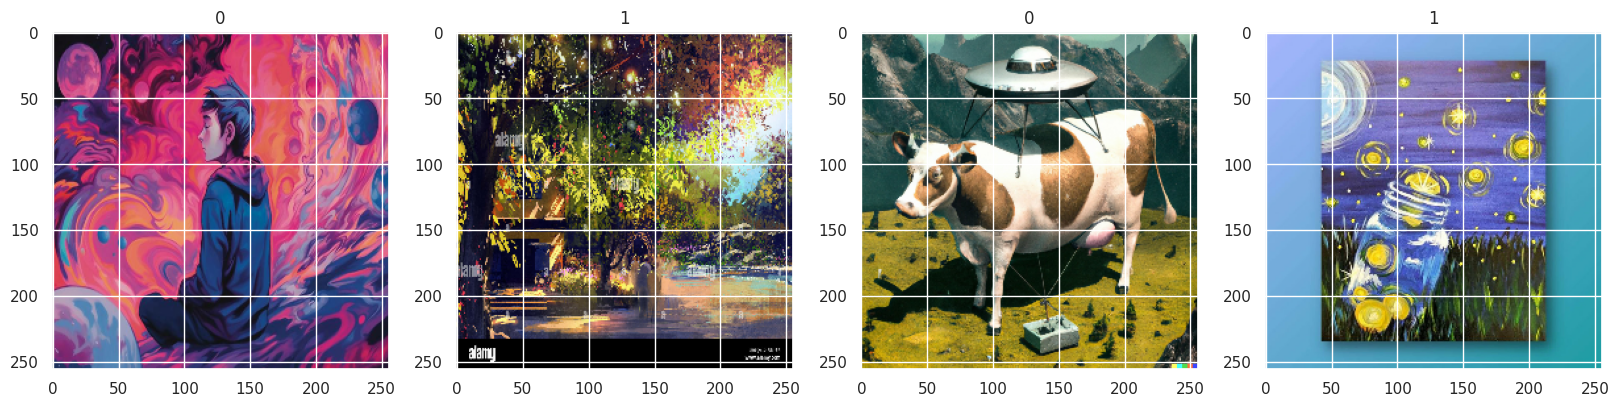

In [ ]:
#@title 0=ai, 1=real
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

# Split data

In [ ]:
train_size = int(len(data)*0.7)
val_size = int(len(data)*0.2)+1
test_size = int(len(data)*0.1)+1
len(data), train_size+val_size+test_size

(29, 29)

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# Deep Model

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(16, (3, 3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)       

In [43]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir='logs')
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
20/20 [==============================] - 115s 5s/step - loss: 0.7998 - accuracy: 0.5094 - val_loss: 0.6772 - val_accuracy: 0.5208
Epoch 2/20
20/20 [==============================] - 102s 5s/step - loss: 0.6751 - accuracy: 0.5953 - val_loss: 0.6551 - val_accuracy: 0.6302
Epoch 3/20
20/20 [==============================] - 94s 4s/step - loss: 0.6165 - accuracy: 0.6672 - val_loss: 0.6090 - val_accuracy: 0.7292
Epoch 4/20
20/20 [==============================] - 86s 4s/step - loss: 0.5271 - accuracy: 0.7531 - val_loss: 0.5318 - val_accuracy: 0.7917
Epoch 5/20
20/20 [==============================] - 89s 4s/step - loss: 0.4288 - accuracy: 0.8234 - val_loss: 0.5263 - val_accuracy: 0.7240
Epoch 6/20
20/20 [==============================] - 86s 4s/step - loss: 0.3553 - accuracy: 0.8734 - val_loss: 0.3952 - val_accuracy: 0.8438
Epoch 7/20
20/20 [==============================] - 85s 4s/step - loss: 0.2766 - accuracy: 0.9031 - val_loss: 0.3101 - val_accuracy: 0.8906
Epoch 8/20
20/20 [

In [46]:
hist.history

{'loss': [0.7998436689376831,
  0.6751453280448914,
  0.616519570350647,
  0.5270751714706421,
  0.4287758469581604,
  0.3553165793418884,
  0.27664852142333984,
  0.21763721108436584,
  0.1755380481481552,
  0.15520472824573517,
  0.13656476140022278,
  0.07130779325962067,
  0.09390069544315338,
  0.07136683166027069,
  0.0641264095902443,
  0.03870290890336037,
  0.021420851349830627,
  0.027584850788116455,
  0.013397453352808952,
  0.005454966798424721],
 'accuracy': [0.5093749761581421,
  0.5953124761581421,
  0.667187511920929,
  0.753125011920929,
  0.823437511920929,
  0.8734375238418579,
  0.903124988079071,
  0.9312499761581421,
  0.942187488079071,
  0.953125,
  0.9609375,
  0.973437488079071,
  0.9750000238418579,
  0.979687511920929,
  0.979687511920929,
  0.989062488079071,
  0.995312511920929,
  0.9937499761581421,
  1.0,
  1.0],
 'val_loss': [0.6772494316101074,
  0.6550922989845276,
  0.6089717745780945,
  0.5317910313606262,
  0.5262894630432129,
  0.3952098190784454

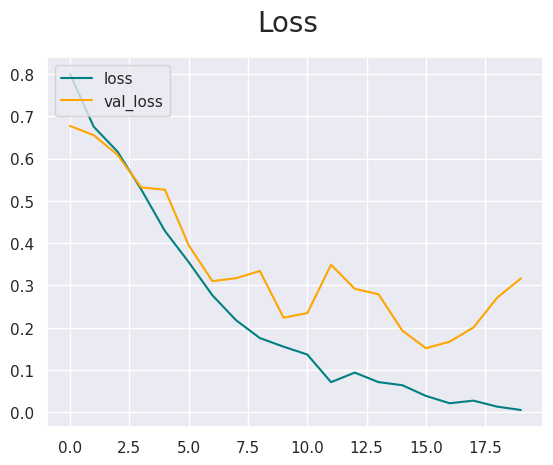

In [47]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

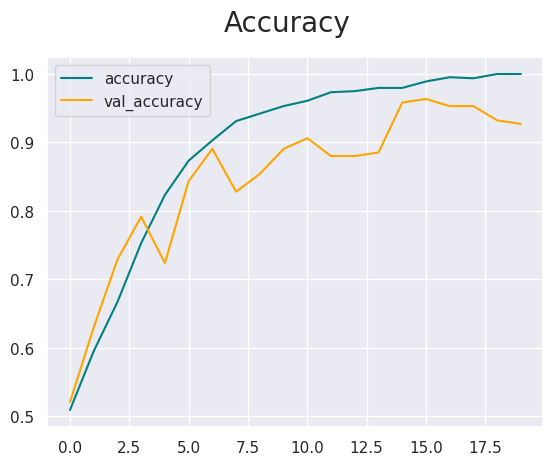

In [48]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

# Evaluation

In [52]:
pre = Precision()
rec = Recall()
acc = BinaryAccuracy()

for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    rec.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 1s 656ms/step


In [53]:
print(f'Precision:{pre.result().numpy()}, Recall:{rec.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:0.9375, Recall:0.97826087474823, Accuracy:0.9569892287254333


# Test real

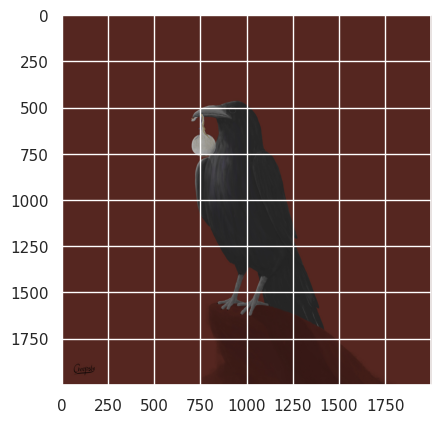

In [99]:
img_real = cv2.imread('ownrealtest.jpg')
plt.imshow(cv2.cvtColor(img_real, cv2.COLOR_BGR2RGB))
plt.show()

In [101]:
resize_real = tf.image.resize(img_real, (256, 256))
yhat_real = model.predict(np.expand_dims(resize_real/255, 0))

if yhat_real > 0.5:
    print(f'Predicted class is REAL: {yhat_real[0]}')
else:
    print(f'Predicted class is AI: {yhat_real[0]}')

1/1 [==============================] - 0s 61ms/step
Predicted class is REAL: [0.99535733]


# Test ai

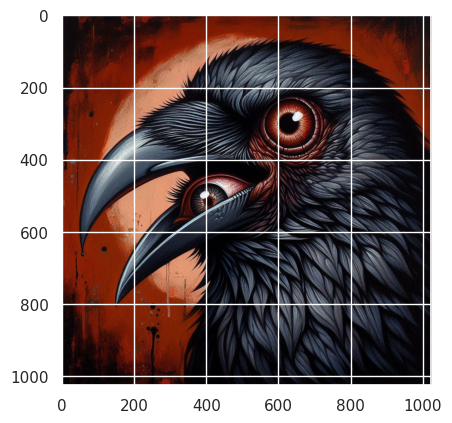

In [102]:
img_ai = cv2.imread('ravenaitest.jpg')
plt.imshow(cv2.cvtColor(img_ai, cv2.COLOR_BGR2RGB))
plt.show()

In [104]:
resize_ai = tf.image.resize(img_ai, (256, 256))
yhat_ai = model.predict(np.expand_dims(resize_ai/255, 0))

if yhat_ai > 0.5:
    print(f'Predicted class is REAL: {yhat_ai[0]}')
else:
    print(f'Predicted class is AI: {yhat_ai[0]}')

1/1 [==============================] - 0s 237ms/step
Predicted class is AI: [0.13955157]
